In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [6]:
scale = StandardScaler()
x = scale.fit_transform(df)

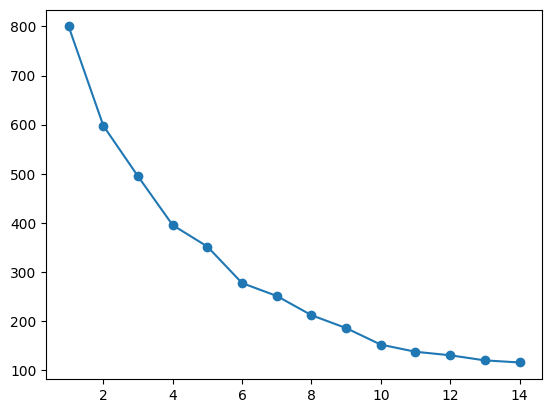

In [7]:
inertia_values = []
k_range = range(1, 15)
for k in k_range:
	model = KMeans(n_clusters=k, random_state=42)
	model.fit(x)
	inertia = inertia_values.append(model.inertia_)

plt.plot(k_range, inertia_values, marker='o')

In [8]:
final_model = KMeans(n_clusters=10, random_state=42)
final_model.fit(x)

df['Cluster'] = final_model.labels_

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#to visualize the clusters in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x) 


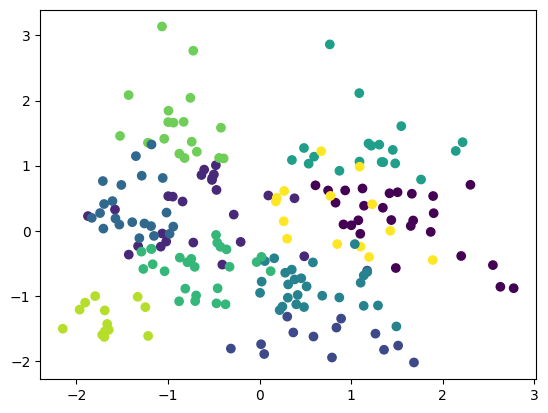

In [11]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'])
plt.show()